# Visualizations of Michigan / Ohio State football data
This notebook accompanies the blog post "Language Models and spatial reasoning: what's good, what is still terrible and what is improving."
Code was produced by Claude 3.5 Sonnet or GPT 4.
Accompanying dataset is from this Wikipedia entry on the Michigan Ohio State football rivalry through 2023.
https://en.wikipedia.org/wiki/Michigan%E2%80%93Ohio_State_football_rivalry



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



## Get data file

In [10]:
url = 'https://raw.githubusercontent.com/nathanbos/blog_spatial_reasoning/main/Michigan%20Ohio%20State%20games.csv'
data = pd.read_csv(url)

## Favoring Michigan- Claude 3.5 Sonnet

In [11]:
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Create a cumulative win count for each team
data['Michigan_Wins'] = (data['Winning Team'] == 'Michigan').cumsum()
data['Ohio_State_Wins'] = (data['Winning Team'] == 'Ohio State').cumsum()

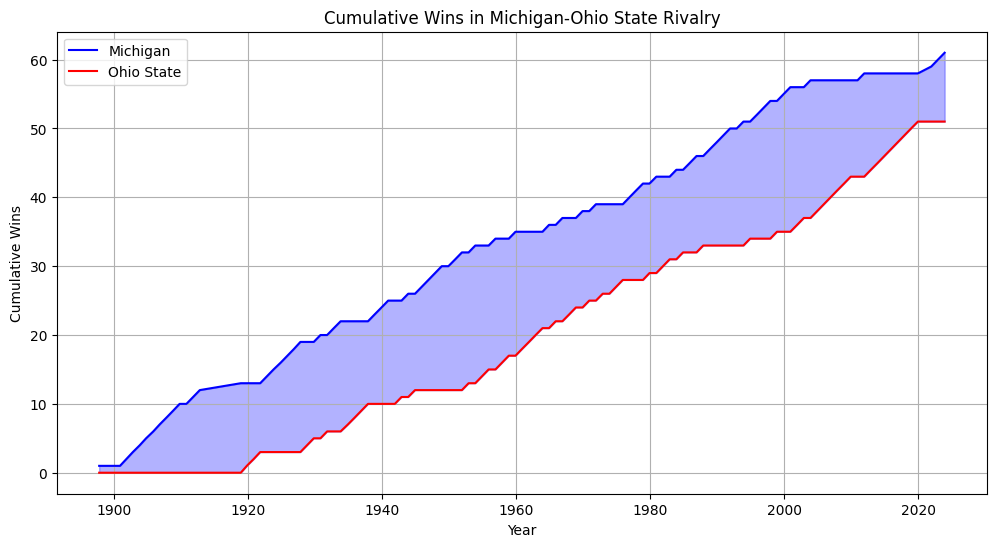

Michigan's total wins: 61
Ohio State's total wins: 51


In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Michigan_Wins'], label='Michigan', color='blue')
plt.plot(data['Date'], data['Ohio_State_Wins'], label='Ohio State', color='red')
plt.title("Cumulative Wins in Michigan-Ohio State Rivalry")
plt.xlabel("Year")
plt.ylabel("Cumulative Wins")
plt.legend()
plt.grid(True)
plt.fill_between(data['Date'], data['Michigan_Wins'], data['Ohio_State_Wins'], where=(data['Michigan_Wins'] > data['Ohio_State_Wins']), color='blue', alpha=0.3)
plt.fill_between(data['Date'], data['Michigan_Wins'], data['Ohio_State_Wins'], where=(data['Michigan_Wins'] <= data['Ohio_State_Wins']), color='red', alpha=0.3)
plt.savefig('michigan_superiority.png')
plt.show()
plt.close()

print("Michigan's total wins:", data['Michigan_Wins'].iloc[-1])
print("Ohio State's total wins:", data['Ohio_State_Wins'].iloc[-1])

## Favoring Ohio State - Claude 3.5 Sonnet

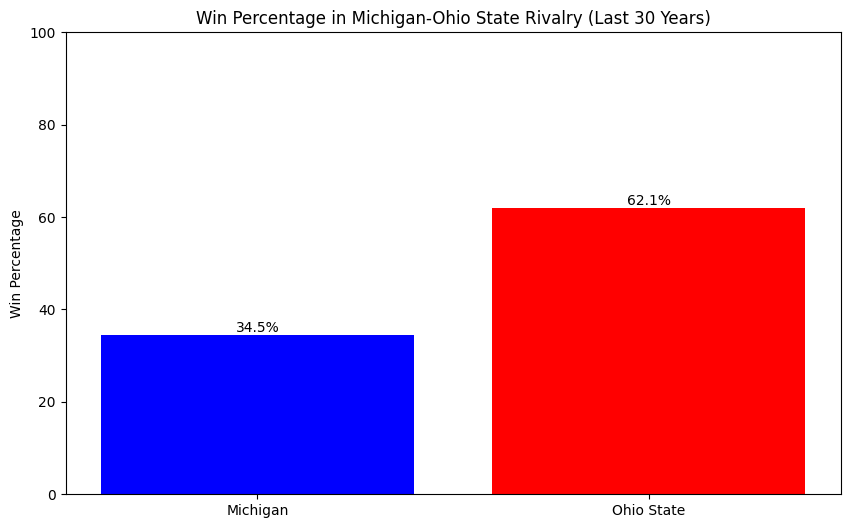

Michigan's win percentage in the last 30 years: 34.5%
Ohio State's win percentage in the last 30 years: 62.1%


In [13]:
# Calculate the win percentage for each team in the last 30 years
recent_data = data[data['Date'] > (data['Date'].max() - pd.Timedelta(days=365*30))]
michigan_recent_wins = (recent_data['Winning Team'] == 'Michigan').sum()
osu_recent_wins = (recent_data['Winning Team'] == 'Ohio State').sum()
total_recent_games = len(recent_data)

michigan_win_pct = michigan_recent_wins / total_recent_games * 100
osu_win_pct = osu_recent_wins / total_recent_games * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(['Michigan', 'Ohio State'], [michigan_win_pct, osu_win_pct], color=['blue', 'red'])
plt.title("Win Percentage in Michigan-Ohio State Rivalry (Last 30 Years)")
plt.ylabel("Win Percentage")
plt.ylim(0, 100)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.savefig('ohio_state_superiority.png')
plt.show()
plt.close()

print(f"Michigan's win percentage in the last 30 years: {michigan_win_pct:.1f}%")
print(f"Ohio State's win percentage in the last 30 years: {osu_win_pct:.1f}%")

## Favoring Michigan - GPT 4

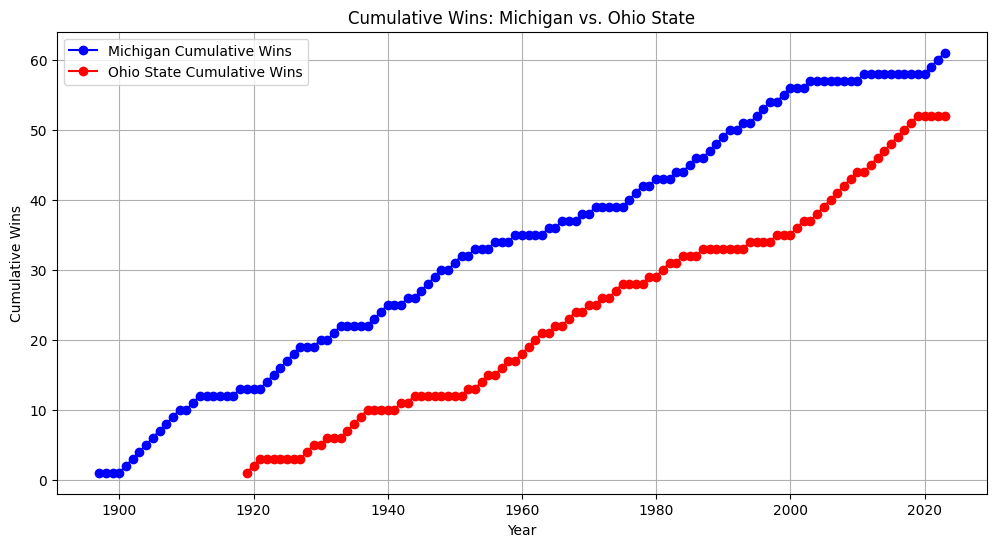

In [14]:
# Correct the inconsistency in the 'Winning Team' column
data['Winning Team'] = data['Winning Team'].replace('Ohio State†', 'Ohio State')

# Extract year from Date for plotting
data['Year'] = pd.to_datetime(data['Date']).dt.year

# Calculate cumulative wins by year for each team
michigan_cumulative_wins = data[data['Winning Team'] == 'Michigan'].groupby('Year').size().cumsum()
ohio_state_cumulative_wins = data[data['Winning Team'] == 'Ohio State'].groupby('Year').size().cumsum()

# Prepare a DataFrame for plotting
cumulative_wins = pd.DataFrame({
    'Year': range(data['Year'].min(), data['Year'].max() + 1)
}).set_index('Year')

cumulative_wins['Michigan'] = michigan_cumulative_wins
cumulative_wins['Ohio State'] = ohio_state_cumulative_wins
cumulative_wins = cumulative_wins.fillna(method='ffill').reset_index()

# Plotting cumulative wins over the years
plt.figure(figsize=(12, 6))
plt.plot(cumulative_wins['Year'], cumulative_wins['Michigan'], label='Michigan Cumulative Wins', color='blue', marker='o')
plt.plot(cumulative_wins['Year'], cumulative_wins['Ohio State'], label='Ohio State Cumulative Wins', color='red', marker='o')
plt.title('Cumulative Wins: Michigan vs. Ohio State')
plt.xlabel('Year')
plt.ylabel('Cumulative Wins')
plt.legend()
plt.grid(True)
plt.show()

## Favoring Ohio State - GPT 4

<Figure size 1200x600 with 0 Axes>

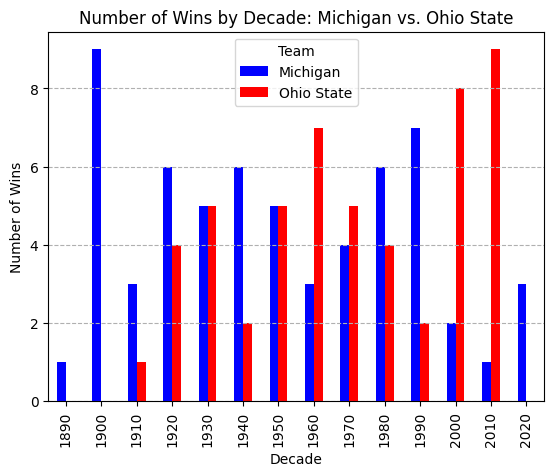

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Correct any inconsistencies in the 'Winning Team' column if they exist
data['Winning Team'] = data['Winning Team'].replace('Ohio State†', 'Ohio State')

# Exclude tie games for the purpose of this analysis
data = data[data['Winning Team'] != 'Tie']

# Extract year and decade for plotting
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Decade'] = (data['Year'] // 10) * 10

# Count wins per decade for each team
decade_wins = data.groupby(['Decade', 'Winning Team']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
decade_wins.plot(kind='bar', stacked=False, color={'Michigan': 'blue', 'Ohio State': 'red'})
plt.title('Number of Wins by Decade: Michigan vs. Ohio State')
plt.xlabel('Decade')
plt.ylabel('Number of Wins')
plt.legend(title='Team')
plt.grid(axis='y', linestyle='--')
plt.show()


## Favoring Michigan #2 - Claude
### Highlighting 3-year streak and National Championship

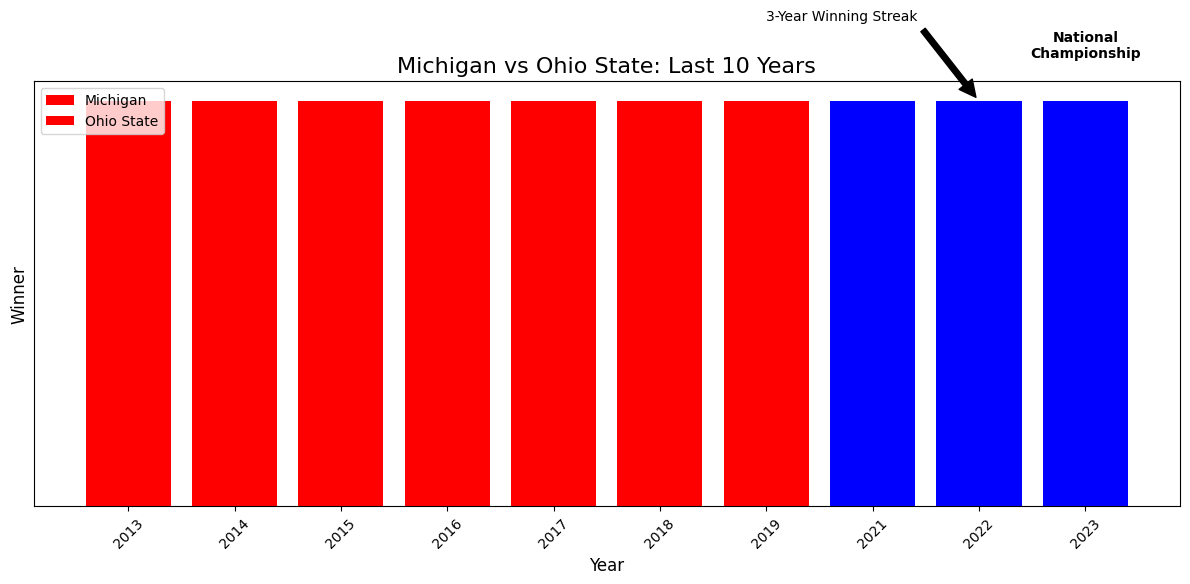

In [17]:
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Filter for the last 10 years
last_10_years = data[data['Date'] > (data['Date'].max() - pd.Timedelta(days=365*10))]

# Create a list of winners
winners = last_10_years['Winning Team'].tolist()

# Create the visualization
plt.figure(figsize=(12, 6))

# Plot the wins
for i, winner in enumerate(winners):
    if winner == 'Michigan':
        color = 'blue'
    else:
        color = 'red'
    plt.bar(i, 1, color=color)

# Customize the plot
plt.title("Michigan vs Ohio State: Last 10 Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Winner", fontsize=12)
plt.yticks([])  # Remove y-axis ticks

# Set x-axis ticks to years
years = [date.year for date in last_10_years['Date']]
plt.xticks(range(len(years)), years, rotation=45)

# Highlight the 3-year winning streak
plt.annotate('3-Year Winning Streak',
             xy=(len(winners)-2, 1),
             xytext=(len(winners)-4, 1.2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

# Add National Championship annotation
plt.text(len(winners)-1, 1.1, 'National\nChampionship',
         ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add a legend
plt.legend(['Michigan', 'Ohio State'], loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()